In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
#data visualization libraries
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

In [4]:
#reading files
df=pd.read_csv("train.csv")
fd=pd.read_csv("test.csv")

In [5]:
df['source']='train'
fd['source']='test'
data=pd.concat([df,fd],ignore_index=True,sort=True)
#concatenating two datasets into one to perform feature engineering on them & then divide them later


In [6]:
print(df.shape,fd.shape,data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [8]:
data.count()#returns total of non null values

Item_Fat_Content             14204
Item_Identifier              14204
Item_MRP                     14204
Item_Outlet_Sales             8523
Item_Type                    14204
Item_Visibility              14204
Item_Weight                  11765
Outlet_Establishment_Year    14204
Outlet_Identifier            14204
Outlet_Location_Type         14204
Outlet_Size                  10188
Outlet_Type                  14204
source                       14204
dtype: int64

In [9]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [10]:
data.isnull().sum() #returns total of null values

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [11]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [12]:
data.corr()
#item outlet sales has a low correlation with item's weight,outlet establishment year & item visibility

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
Item_MRP,1.000000,0.567574,-0.006351,0.036236,0.000141
Item_Outlet_Sales,0.567574,1.000000,-0.128625,0.014123,-0.049135
Item_Visibility,-0.006351,-0.128625,1.000000,-0.015901,-0.083678
Item_Weight,0.036236,0.014123,-0.015901,1.000000,0.000645
Outlet_Establishment_Year,0.000141,-0.049135,-0.083678,0.000645,1.000000


In [13]:
#doing analysis by generating scatter plot

In [14]:
def calsc(x):
    plt.figure(figsize=(12,7))
    plt.xlabel(x)
    plt.ylabel("Item_Outlet_Sales")
    plt.plot(data[x],data["Item_Outlet_Sales"],'.',alpha=0.3)

In [15]:
nv=[x for x in data.dtypes.index if ((data.dtypes[x]=="float64") or (data.dtypes[x]=="int64"))]
#filtering numerical variable

In [16]:
nv=[x for x in nv if x not in ['Item_Outlet_Sales'] ]

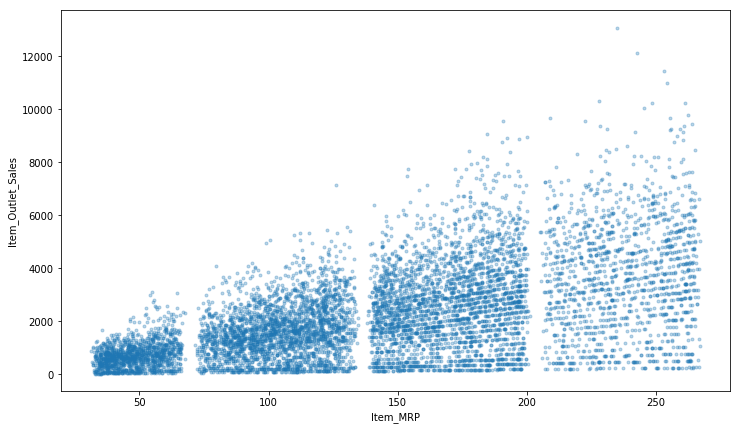

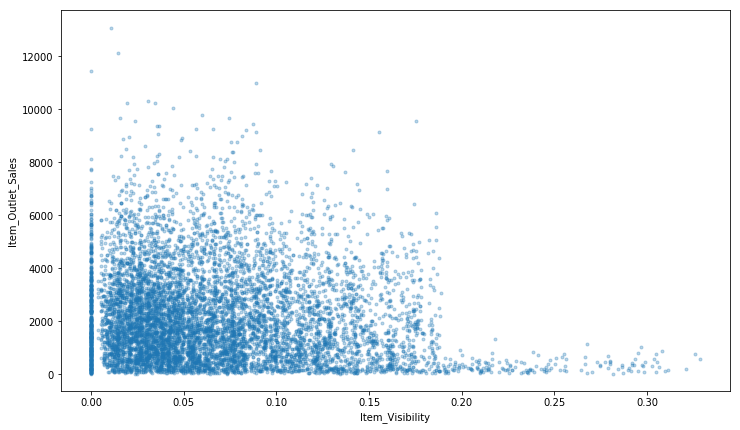

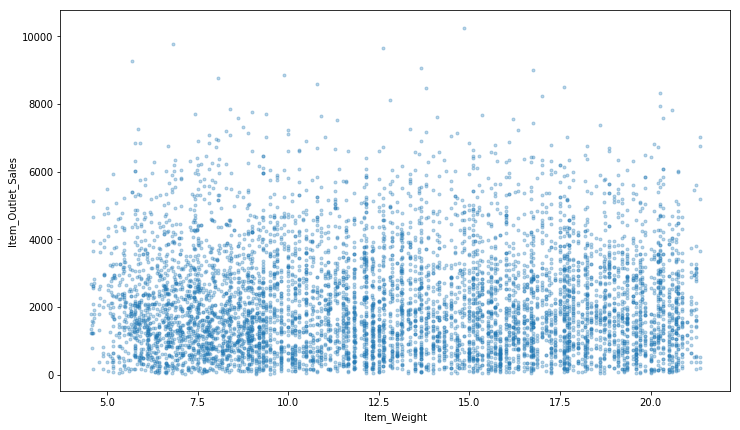

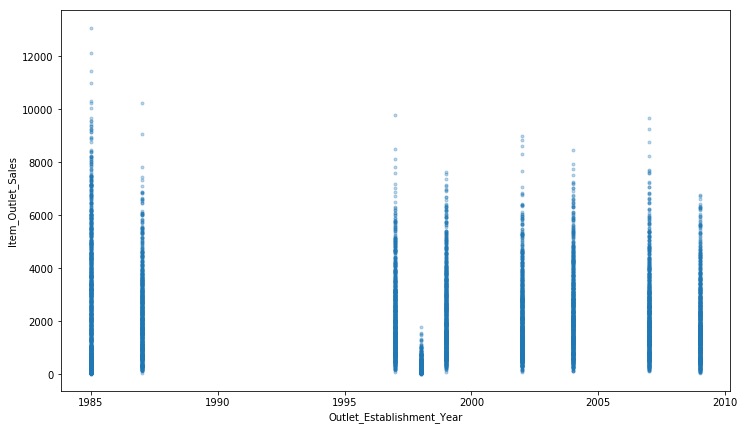

In [17]:
for i in range(0,4):
    calsc(nv[i])

In [18]:
ct=[x for x in data.dtypes.index if data.dtypes[x]=='object']

In [19]:
ct=[x for x in ct if x not in['Item_Identifier','Outlet_Identifier','source']]

In [20]:
for col in ct:
    print(data[col].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


In [21]:
def clritem_fat():
    data["Item_Fat_Content"]=data["Item_Fat_Content"].replace(to_replace="low fat",value="Low Fat")
    data["Item_Fat_Content"]=data["Item_Fat_Content"].replace(to_replace="LF",value="Low Fat")
    data["Item_Fat_Content"]=data["Item_Fat_Content"].replace(to_replace="reg",value="Regular")

In [22]:
clritem_fat()

In [23]:
data["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [24]:
def clritem_weight():
    wm=data['Item_Weight'].mean()
    data['Item_Weight']=data["Item_Weight"].replace(to_replace=np.nan,value=wm)

In [25]:
clritem_weight()

In [26]:
from scipy.stats import mode
outlet_size_mode=data.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x:mode(x).mode[0]))
print("mode for each outlet type",outlet_size_mode)
miss_b=data["Outlet_Size"].isnull()
miss=data["Outlet_Size"].isnull().sum()
print('missing values',miss)
data.loc[miss_b,"Outlet_Size"]=data.loc[miss_b,"Outlet_Type"].apply(lambda x: outlet_size_mode[x])

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


mode for each outlet type Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
missing values 4016


In [27]:
visibility_item_avg=data.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [28]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility

In [29]:
print ('Original #zeros: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility']=data[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))


Original #zeros: 879
Final #zeros: 0


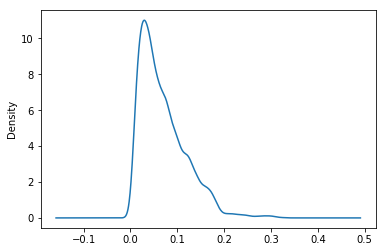

In [30]:
data["Item_Visibility"].plot.density()

In [31]:
data["Item_Type_Combined"]=data["Item_Identifier"].apply(lambda x: x[0:2])
data["Item_Type_Combined"]=data["Item_Type_Combined"].map({'FD':'Food','NC':"non-consumable","DR":"Drinks"})
data["Item_Type_Combined"].value_counts()

Food              10201
non-consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [32]:
#data['Item_Visibility_mean']=data.apply(lambda x: x["Item_Visibility"]/visibility_item_avg[x["Item_Identifier"]],axis=1)

In [33]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()


count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [34]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [35]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [36]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [37]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [38]:
ta=["Item_Outlet_Sales"]
idc = ['Item_Identifier','Outlet_Identifier']
sd=pd.read_csv("train_modified.csv")
ds=pd.read_csv("test_modified.csv")

In [39]:
def meanbased():
     #Mean based:
    mean_sales = df['Item_Outlet_Sales'].mean()
    base = fd[['Item_Identifier','Outlet_Identifier']]
    base['Item_Outlet_Sales'] = mean_sales
    base.to_csv("alg0.csv",index=False)

In [40]:
meanbased()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [41]:
def linearregression():
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression(normalize=True)
    X_train = sd.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
    Y_train = sd['Item_Outlet_Sales']
    X_test = ds.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()
    lr.fit(X_train, Y_train)
    lr_pred = lr.predict(X_test)
    lr_accuracy = round(lr.score(X_train,Y_train) * 100,2)
    print('accuracy from linear regression is %.4g' %lr_accuracy)
    linear_submission = pd.DataFrame({
    'Item_Identifier':ds['Item_Identifier'],
    'Outlet_Identifier':ds['Outlet_Identifier'],
    'Item_Outlet_Sales': lr_pred
    },columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
    linear_submission.to_csv('linear_algo.csv',index=False)

In [42]:
linearregression()

accuracy from linear regression is 56.34


In [43]:
def decision_tree():
    from sklearn.tree import DecisionTreeRegressor
    X_train = sd.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
    Y_train = sd['Item_Outlet_Sales']
    X_test = ds.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()
    tree = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
    tree.fit(X_train,Y_train)
    tree_pred = tree.predict(X_test)
    tree_accuracy = round(tree.score(X_train,Y_train)*100,2)
    print('decision tree score is : %.4g'%tree_accuracy)
    tree_submission = pd.DataFrame({
    'Item_Identifier':ds['Item_Identifier'],
    'Outlet_Identifier':ds['Outlet_Identifier'],
    'Item_Outlet_Sales': tree_pred
    },columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
    tree_submission.to_csv('tree_algo.csv',index=False)

In [44]:
decision_tree()

decision tree score is : 61.46


In [45]:
#randomForest
def random_forest():
    from sklearn.ensemble import RandomForestRegressor
    X_train = sd.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
    Y_train = sd['Item_Outlet_Sales']
    X_test = ds.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()
    rf = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
    rf.fit(X_train,Y_train)
    rf_pred = rf.predict(X_test)
    rf_accuracy = round(rf.score(X_train,Y_train)*100,2)
    print('accuracy of random forest is : %.4g' %rf_accuracy)

In [46]:
random_forest()

accuracy of random forest is : 60.79
